In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [41]:
df = pd.read_csv("database_IND.csv")
df.shape

(908, 25)

In [42]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [43]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

There are missing values in many columns but only latitute, longitude and geolocation_source need to handle. Other missing values are just need to replaced by zero.

In [44]:
missing_col = ["latitude", 'longitude', "geolocation_source"]
df = df.fillna(df[missing_col].mode().loc[0])
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [45]:
# filling the rest of the cocolumns with zero
df = df.fillna(0)

In [46]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## EDA

Some of the featues are not useful for the prediction for example name, owner, url are unique for a given instance. We can drop these columns.

In [47]:
df = df.drop(["name", "url", "owner", "source", "wepp_id", "country_long",
              "country", "gppd_idnr", "year_of_capacity_data", "generation_data_source","other_fuel3"], axis = 1)

In [48]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,2.5,28.1839,73.2407,Solar,0,0,2011.0,National Renewable Energy Laboratory,0.000000,0.000000,0.000,0.000000,0.000000,0.0
1,98.0,24.7663,74.6090,Coal,0,0,0.0,WRI,0.000000,0.000000,0.000,0.000000,0.000000,0.0
2,39.2,21.9038,69.3732,Wind,0,0,0.0,WRI,0.000000,0.000000,0.000,0.000000,0.000000,0.0
3,135.0,23.8712,91.3602,Gas,0,0,2004.0,WRI,631.777928,617.789264,843.747,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,Coal,Oil,0,2015.0,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0.0


In [50]:
# filtering the categorical variables
columns = list(df.columns)
cat_feat = []
for column in df.columns:
    if df[column].dtypes == 'object':
        cat_feat.append(column)
cat_feat

['primary_fuel', 'other_fuel1', 'other_fuel2', 'geolocation_source']

In [52]:
columns = list(df.columns)
columns

['capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'commissioning_year',
 'geolocation_source',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

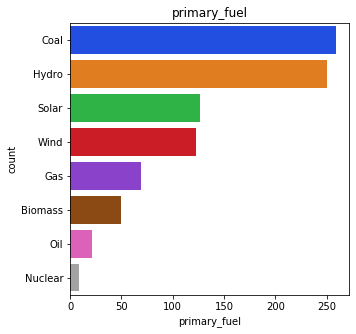

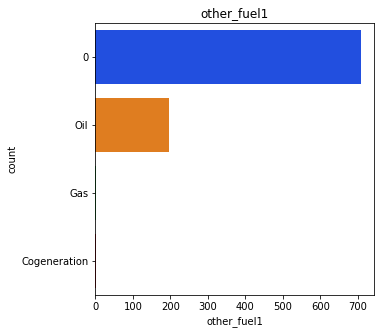

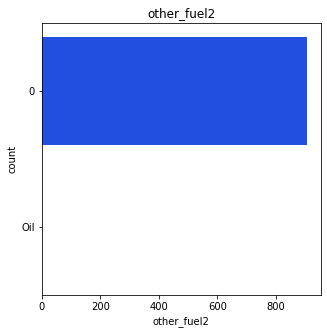

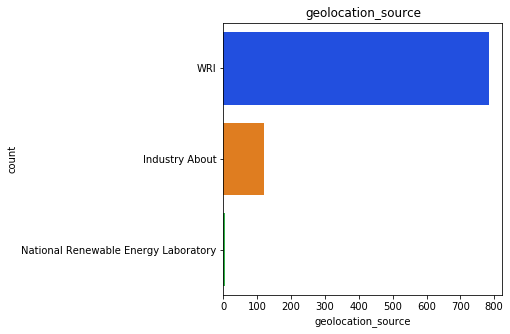

In [61]:
for feat in cat_feat:
    count = df[feat].value_counts()
    plt.figure(figsize=(5, 5))
    sns.barplot(count.values, count.index,  palette='bright')
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel("count")
    plt.tick_params(labelsize=10)
    plt.show()

## handling the categorical variable

In [63]:
df.dtypes

capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                  int32
other_fuel1                  object
other_fuel2                  object
commissioning_year          float64
geolocation_source           object
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
estimated_generation_gwh    float64
dtype: object

In [64]:
columns = list(df.columns)
cat_feat = []
for column in df.columns:
    if df[column].dtypes == 'object':
        cat_feat.append(column)
lcat_feat

['other_fuel1', 'other_fuel2', 'geolocation_source']

### Label encoder

In [68]:
from sklearn.preprocessing import LabelEncoder
for column in cat_feat:
    encoder = LabelEncoder()
    df[column] = df[column].astype(str)
    df[column] = encoder.fit_transform(df[column])

In [73]:
num_feat = []
columns = list(df.columns)
for column in columns:
    if column == "primary_fuel" or column == "capacity_mw":
        pass
    else:
        num_feat.append(column)
num_feat

['latitude',
 'longitude',
 'other_fuel1',
 'other_fuel2',
 'commissioning_year',
 'geolocation_source',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'estimated_generation_gwh']

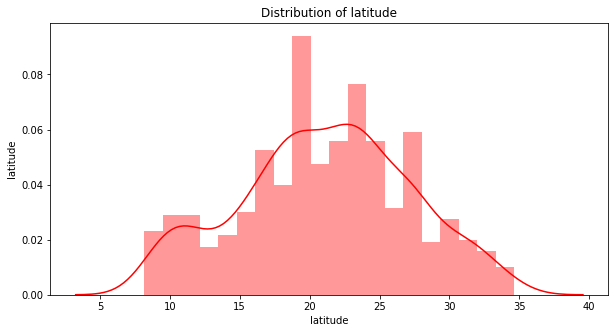

In [79]:
latitude = df['latitude'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['latitude'], bins=20, color = "r")
plt.title('Distribution of latitude')
plt.xlabel('latitude')
plt.ylabel('latitude')
plt.tick_params(labelsize=10)
plt.show()

The distribution is normal.

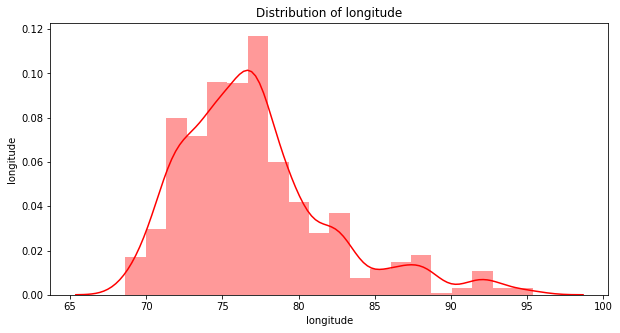

In [80]:
longitude = df['longitude'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['longitude'], bins=20, color = "r")
plt.title('Distribution of longitude')
plt.xlabel('longitude')
plt.ylabel('longitude')
plt.tick_params(labelsize=10)
plt.show()

The distribution is normal but skeness is clearly visible.

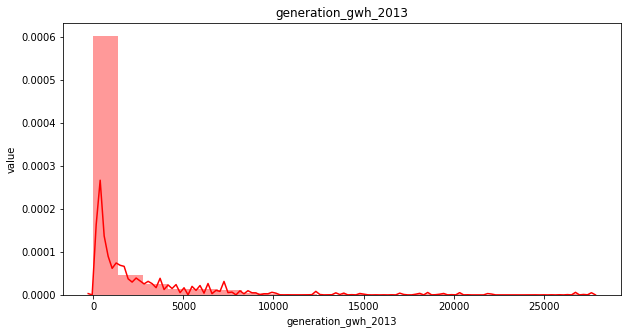

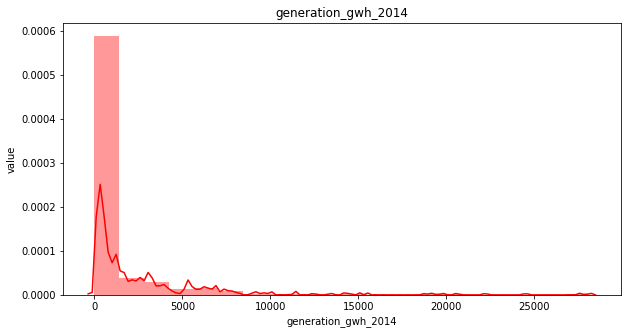

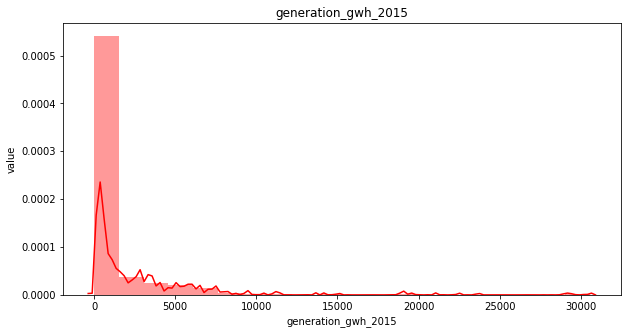

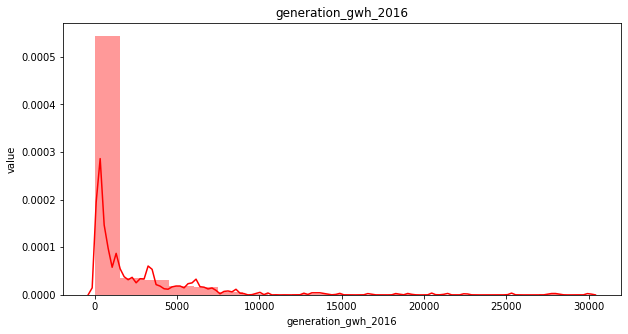

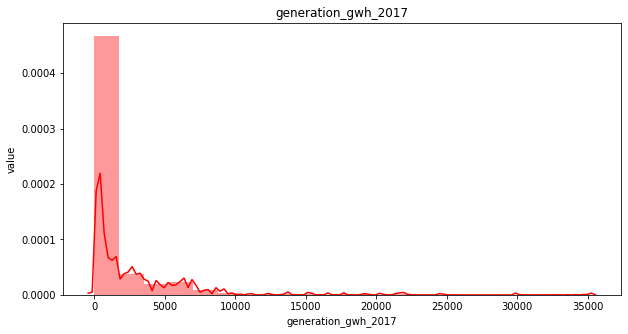

In [92]:
generation = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

for gen in generation:
    generation_gwh_2013 = df[gen].value_counts()
    plt.figure(figsize=(10, 5))
    sns.distplot(df[gen], bins=20, color = "r")
    plt.title(gen)
    plt.xlabel(gen)
    plt.ylabel("value")
    plt.tick_params(labelsize=10)
    plt.show()

All the genarations have very similar distribution and skewness is clearly visible.

### splitting the features and targets

In [93]:
X = df.drop(['primary_fuel', "capacity_mw"], axis=1)
y1 = df['primary_fuel']
y2 = df["capacity_mw"]